# ¡Hola Luis! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Luis! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
calls=pd.read_csv("/datasets/megaline_calls.csv")
web_sessions=pd.read_csv("/datasets/megaline_internet.csv")
messages=pd.read_csv("/datasets/megaline_messages.csv")
plans=pd.read_csv("/datasets/megaline_plans.csv")
users=pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Se puede percibir que no tenemos inconveniente alguno con este dataframe hablando de temas de valores nulos. Sin embargo, existe un manejo diverso e ineficiente de múltiples unidades para una misma variable (uso de datos móviles), que podría complicar el análisis. La recomendación sería hacer la transición de ciertas columnas de datos para que, tanto el texto de su título como los valores de la columna, atiendas a una única unidad de medida general para todo el análisis. En este caso, sería cuestión de transformar todas las columnas que su info se basa en MB para que su info esté basada en GB. Para poder hacer esto, será necesario hacer cambio de títulos de columnas, cambio de unidades y aplicación de operaciones sobre los datos de ciertas columnas. Particularmente, para poder contar con los valores para ambas unidades, se preferirá por mantener la columna de "mb_per_month_included" y crear una nueva que en vez de estar con base en la unidad MB, esté con base en la unidad GB.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
#cambio de tipos de datos en las columnas en las que sugiero realizar cambios
plans["mb_per_month_included"]=plans["mb_per_month_included"].astype("float")
plans["usd_monthly_pay"]=plans["usd_monthly_pay"].astype("float")
plans["usd_per_gb"]=plans["usd_per_gb"].astype("float")

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans["gb_per_month_included"]=plans["mb_per_month_included"]/1024
plans.info()
print(plans.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(6), int64(2), object(1)
memory usage: 272.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                15360.0               500   
1               1000                30720.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute p

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Bien, correcto. Bien hecho al modificar la unidad del consumo de internet.



</div>

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
print('Number of unique values in columns "user_id"="', users["user_id"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Number of unique values in columns "user_id"=" 500


In [8]:
# Imprime una muestra de datos para usuarios
print(users.sample(10))


     user_id first_name  last_name  age  \
385     1385     Nohemi   Erickson   52   
69      1069       Dino        Fry   31   
206     1206    Angelic  Singleton   21   
393     1393   Wilfredo       Rosa   44   
455     1455       Jude    Fischer   20   
158     1158      Robin   Thornton   20   
366     1366        Rod       Huff   62   
134     1134    Shannon    Nichols   71   
57      1057       Theo    Sargent   18   
482     1482     Armand      Glenn   70   

                                               city    reg_date      plan  \
385       New York-Newark-Jersey City, NY-NJ-PA MSA  2018-01-19      surf   
69         Houston-The Woodlands-Sugar Land, TX MSA  2018-09-17  ultimate   
206                   Providence-Warwick, RI-MA MSA  2018-07-09      surf   
393                               Knoxville, TN MSA  2018-10-29      surf   
455                  Denver-Aurora-Lakewood, CO MSA  2018-08-13      surf   
158  Virginia Beach-Norfolk-Newport News, VA-NC MSA  2018-11-30 

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Directamente al analizar la información general recibida por medio de info(), se pued enlistar los siguientes problemas:
1. la columna "churn_date" tiene muchos valores ausentes. Se buscará definir un valor genérico de fecha que implique una fecha que no ha ocurrido y muy lejana en el futuro, con la finalidad de entender que para todos esos usuarios no ha ocurrido ese proceso de baja del servicio. 
2. la columna "reg_date" y "churn_date" son de tipo object, lo cual es probable que no sea lo más conveniente para análisis, por lo que sería recomendable hacer el cambio a tipo datetime.
3. Los datos de la columna "city" abarcan mucha información, aparte de la ciudad de residencia, en un solo valor. La recomendación sería buscar desglozar toda esa información en múltiples columnas.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
#LLenar los valores vacíos con una fecha default para simbolizar que la fecha no ha pasado
users["churn_date"].fillna("2200-12-31",inplace=True)
#Cambio de tipo de dato a datetime para columna "churn_date"
users["churn_date"]=pd.to_datetime(users["churn_date"],format="%Y-%m-%d")
#Cambio de tipo de dato a datetime para columna "reg_date"
users["reg_date"]=pd.to_datetime(users["reg_date"],format="%Y-%m-%d")

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#Definición de nueva columna para desglozar la actual columna "city" en campos de ciudad/suburbio, estado y designación estadística
users["city_suburb"]=users["city"].str.split(",").str[0]
users["state_code"]=users["city"].str.split(", ").str[1].str.split(" ").str[0]
users["statistical_designation"]=users["city"].str.split(", ").str[1].str.split(" ").str[1]
users.info()
print(users.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  500 non-null    int64         
 1   first_name               500 non-null    object        
 2   last_name                500 non-null    object        
 3   age                      500 non-null    int64         
 4   city                     500 non-null    object        
 5   reg_date                 500 non-null    datetime64[ns]
 6   plan                     500 non-null    object        
 7   churn_date               500 non-null    datetime64[ns]
 8   city_suburb              500 non-null    object        
 9   state_code               500 non-null    object        
 10  statistical_designation  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 43.1+ KB
     user_id first_name last_nam

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
print('Number of unique values in column "id"="', calls["id"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
Number of unique values in column "id"=" 137735


In [12]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(10))


              id  user_id   call_date  duration
79198    1284_57     1284  2018-11-17      4.67
26961   1101_288     1101  2018-12-14      0.00
116938  1408_587     1408  2018-06-14      6.98
49400    1179_59     1179  2018-12-30      3.26
131051  1470_500     1470  2018-09-12      7.48
137168   1498_93     1498  2018-02-16      4.81
120788  1421_130     1421  2018-12-29      7.91
41626   1153_358     1153  2018-10-30      9.62
29835     1113_5     1113  2018-10-04     10.33
37154   1140_438     1140  2018-08-26      0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Atendiendo inicialmente al detalle de la información general obtenida por medio de info(), se puede observar que:
1. La columna "call_date" es de tipo object y hace relación a fechas. Para propósitos de análisis posteriores, se hará la transformación a tipo datetime
2. Una de las reglas de Megaline es que las llamadas se redondean al entero mayor más próximo de la duración de la llamada, por lo que no parece necesario usar a estos campos como float, por lo que se generará el cambio a int y se generará un redondeo.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
#Cambio de tipo de dato a datetime para columna "call_date"
calls["call_date"]=pd.to_datetime(calls["call_date"],format="%Y-%m-%d")
#Redondeo de los valores de columna "duration" al valor mayor más próximo
calls["duration"]=np.ceil(calls["duration"])
#Cambio de la columna "duration" de tipo float a int
calls["duration"]=calls["duration"].astype(int)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, la conversión de la duración a duración que se factura está correcta

</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
#No percibo necesario la adición de ningún tipo de información
calls.info()
print(calls.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
              id  user_id  call_date  duration
118014  1412_298     1412 2018-09-28         0
39335    1147_58     1147 2018-07-06         2
68396   1246_415     1246 2018-08-24         0
55634   1199_273     1199 2018-10-26         6
71668   1255_291     1255 2018-11-02         3
128454   1461_38     1461 2018-11-24        12
40044   1147_880     1147 2018-08-30         0
9958    1045_110     1045 2018-11-29        11
89969   1326_620     1326 2018-08-15         6
94649   1336_541     1336 2018-09-04         0


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()
print('Number of unique values in column "id"="', messages["id"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Number of unique values in column "id"=" 76051


In [16]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(10))


             id  user_id message_date
43619  1289_198     1289   2018-12-31
33648   1212_19     1212   2018-11-24
56602  1357_298     1357   2018-07-30
289    1002_349     1002   2018-11-10
52216  1336_170     1336   2018-11-09
6195   1055_313     1055   2018-12-24
58559   1372_31     1372   2018-12-30
69603   1453_51     1453   2018-12-05
1283   1011_246     1011   2018-07-01
60425  1381_538     1381   2018-11-02


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Atendiendo inicialmente al detalle de la información general obtenida por medio de info(), se puede observar que:
1. La columna "message_date" es de tipo object y hace relación a fechas. Para propósitos de análisis posteriores, se hará la transformación a tipo datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
#Cambio de tipo de dato a datetime para columna "message_date"
messages["message_date"]=pd.to_datetime(messages["message_date"],format="%Y-%m-%d")

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#No percibo necesario la adición de ningún tipo de información
messages.info()
print(messages.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
             id  user_id message_date
70873  1460_432     1460   2018-09-22
56531  1357_161     1357   2018-09-12
11948  1079_347     1079   2018-09-23
67625   1439_19     1439   2018-05-05
31695  1196_179     1196   2018-06-06
11381  1077_652     1077   2018-03-29
62092   1388_86     1388   2018-12-20
35588    1231_7     1231   2018-08-22
52193  1336_144     1336   2018-04-09
53655  1340_181     1340   2018-09-18


<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Muy bien con las modificaciones, bien al hacer la conversión a tipo fecha.



</div>

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
web_sessions.info()
print('Number of unique values in column "id"="', web_sessions["id"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
Number of unique values in column "id"=" 104825


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(web_sessions.sample(10))


             id  user_id session_date  mb_used
99101  1467_238     1467   2018-08-28   625.15
37821  1171_192     1171   2018-08-26     0.00
59974   1270_85     1270   2018-12-19     0.00
98883   1467_20     1467   2018-07-25   153.37
44363  1196_372     1196   2018-04-19   109.57
20993    1098_9     1098   2018-09-21   414.93
4758   1028_318     1028   2018-11-14    43.20
69677   1325_79     1325   2018-11-27   311.06
81566  1382_158     1382   2018-11-28   301.01
39049  1175_105     1175   2018-12-17   459.35


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Atendiendo inicialmente al detalle de la información general obtenida por medio de info(), se puede observar que:
1. La columna "session_date" es de tipo object y hace relación a fechas. Para propósitos de análisis posteriores, se hará la transformación a tipo datetime
2. Una nota a manera de recordatorio, aunque no se aplicable aquí para preprocesamiento de datos, es que será bueno generar posteriormente un nuevo Dataframe en el que se pueda determinar el acumulado de cada user_id para poder saber si pasó su límite definido por el plan al que está subscrito.
3. No se realizará la transformación de la columna "mb_used" a unidades de GB porque se puede aprovechar el uso de estos datos bajo la unidad de MB ya que se cuenta en el dataframe de tarifas con base en MB y GB.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
#Cambio de tipo de dato a datetime para columna "session_date"
web_sessions["session_date"]=pd.to_datetime(web_sessions["session_date"],format="%Y-%m-%d")

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#No percibo necesario la adición de ningún tipo de información
web_sessions.info()
print(web_sessions.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
              id  user_id session_date  mb_used
101998   1489_10     1489   2018-09-23   673.91
3641     1022_52     1022   2018-12-20    11.47
95405    1445_53     1445   2018-09-01   433.81
59998   1270_151     1270   2018-10-17   433.68
33773   1153_324     1153   2018-11-03   501.47
36618   1164_301     1164   2018-05-05   674.08
51992    1233_72     1233   2018-11-03     0.00
90577   1417_170     1417   2018-08-18   927.87
4621    1028_178     1028   2018-04-08   799.61
70503    1329_93     13

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Correcta la modificación de la columna de fecha.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                15360.0               500   
1               1000                30720.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0             20.0        10.0             0.03            0.03      surf   
1             70.0         7.0             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#Agregar al dataframe de llamadas la columna de mes relacionado a la fecha de la llamada.
calls["month"] = calls["call_date"].dt.month
#Agrupación de las llamadas por usuario y mes, para conteo de llamadas en cada mes por cliente
calls_user_month=calls.groupby(["user_id","month"])["id"].size().reset_index()
calls_user_month.columns = ['user_id', 'month', 'num_calls']
calls_user_month = calls_user_month.sort_values(['user_id', 'month'], ascending=True)
print(calls_user_month.head(30))


    user_id  month  num_calls
0      1000     12         16
1      1001      8         27
2      1001      9         49
3      1001     10         65
4      1001     11         64
5      1001     12         56
6      1002     10         11
7      1002     11         55
8      1002     12         47
9      1003     12        149
10     1004      5         21
11     1004      6         44
12     1004      7         49
13     1004      8         49
14     1004      9         42
15     1004     10         61
16     1004     11         54
17     1004     12         50
18     1005     12         59
19     1006     11          2
20     1006     12          9
21     1007      8         70
22     1007      9         63
23     1007     10         80
24     1007     11         80
25     1007     12         87
26     1008     10         71
27     1008     11         63
28     1008     12         85
29     1009      5         71


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Agrupación de las llamadas por usuario y mes, para conteo de minutos en cada mes por cliente
minutes_user_month=calls.groupby(["user_id","month"])["duration"].sum().reset_index()
minutes_user_month.columns = ['user_id', 'month', 'num_minutes']
minutes_user_month = minutes_user_month.sort_values(['user_id', 'month'], ascending=True)
print(minutes_user_month.head(30))


    user_id  month  num_minutes
0      1000     12          124
1      1001      8          182
2      1001      9          315
3      1001     10          393
4      1001     11          426
5      1001     12          412
6      1002     10           59
7      1002     11          386
8      1002     12          384
9      1003     12         1104
10     1004      5          193
11     1004      6          275
12     1004      7          381
13     1004      8          354
14     1004      9          301
15     1004     10          365
16     1004     11          476
17     1004     12          427
18     1005     12          496
19     1006     11           10
20     1006     12           59
21     1007      8          456
22     1007      9          399
23     1007     10          645
24     1007     11          524
25     1007     12          617
26     1008     10          476
27     1008     11          446
28     1008     12          634
29     1009      5          534


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, correcto el cálculo del consumo mensual de llamadas para cada usuario.


</div>

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Agregar al dataframe de mensajes la columna de mes relacionado a la fecha del mensaje.
messages["month"] = messages["message_date"].dt.month
#Agrupación de los mensajes por usuario y mes, para conteo de mensajes en cada mes por cliente
messages_user_month=messages.groupby(["user_id","month"])["id"].size().reset_index()
messages_user_month.columns = ['user_id', 'month', 'num_messages']
messages_user_month = messages_user_month.sort_values(['user_id', 'month'], ascending=True)
print(messages_user_month.head(30))


    user_id  month  num_messages
0      1000     12            11
1      1001      8            30
2      1001      9            44
3      1001     10            53
4      1001     11            36
5      1001     12            44
6      1002     10            15
7      1002     11            32
8      1002     12            41
9      1003     12            50
10     1004      5             7
11     1004      6            18
12     1004      7            26
13     1004      8            25
14     1004      9            21
15     1004     10            24
16     1004     11            25
17     1004     12            31
18     1005     12            11
19     1006     11            15
20     1006     12           139
21     1007      8            51
22     1007      9            47
23     1007     10            59
24     1007     11            48
25     1007     12            50
26     1008     10            21
27     1008     11            37
28     1008     12            26
29     101

In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Agregar al dataframe de sesiones web la columna de mes relacionado a la fecha de la sesión web.
web_sessions["month"] = web_sessions["session_date"].dt.month
#Agrupación de las sesiones por usuario y mes, para conteo de MB y GB utilizados en cada mes por cliente
mb_user_month=web_sessions.groupby(["user_id","month"])["mb_used"].sum().reset_index()
mb_user_month.columns = ['user_id', 'month', 'mb_amount']
mb_user_month["gb_amount"]=mb_user_month["mb_amount"]/1024
mb_user_month = mb_user_month.sort_values(['user_id', 'month'], ascending=True)
print(mb_user_month.head(30))

    user_id  month  mb_amount  gb_amount
0      1000     12    1901.47   1.856904
1      1001      8    6919.15   6.756982
2      1001      9   13314.82  13.002754
3      1001     10   22330.49  21.807119
4      1001     11   18504.30  18.070605
5      1001     12   19369.18  18.915215
6      1002     10    6552.01   6.398447
7      1002     11   19345.08  18.891680
8      1002     12   14396.24  14.058828
9      1003     12   27044.14  26.410293
10     1004      5    6547.21   6.393760
11     1004      6   20672.82  20.188301
12     1004      7   24516.62  23.942012
13     1004      8   27981.74  27.325918
14     1004      9   18852.72  18.410859
15     1004     10   14541.63  14.200811
16     1004     11   21850.78  21.338652
17     1004     12   21389.29  20.887979
18     1005     12   17140.17  16.738447
19     1006     11    2068.37   2.019893
20     1006     12   32118.82  31.366035
21     1007      8   24439.88  23.867070
22     1007      9   28123.95  27.464795
23     1007     

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, correcto el cálculo de consumo de mensajes e internet. Luego, el internet se debe convertir a gb y aproximarse hacia arriba.

</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#fusión de dataframes de llamadas y minutos por usuario al mes
df_combined_calls_minutes = calls_user_month.merge(minutes_user_month, on=['user_id', 'month'], how='outer')
#fusión de dataframes de llamadas, minutos y mensajes por usuario al mes
df_combined_calls_minutes_messages = df_combined_calls_minutes.merge(messages_user_month, on=['user_id', 'month'], how='outer')
#fusión de dataframes de llamadas, minutos, mensajes y datos móviles por usuario al mes
df_combined = df_combined_calls_minutes_messages.merge(mb_user_month, on=['user_id', 'month'], how='outer')

df_combined = df_combined.sort_values(['user_id', 'month'], ascending=True)
print(df_combined.head(30))


    user_id  month  num_calls  num_minutes  num_messages  mb_amount  gb_amount
0      1000     12       16.0        124.0          11.0    1901.47   1.856904
1      1001      8       27.0        182.0          30.0    6919.15   6.756982
2      1001      9       49.0        315.0          44.0   13314.82  13.002754
3      1001     10       65.0        393.0          53.0   22330.49  21.807119
4      1001     11       64.0        426.0          36.0   18504.30  18.070605
5      1001     12       56.0        412.0          44.0   19369.18  18.915215
6      1002     10       11.0         59.0          15.0    6552.01   6.398447
7      1002     11       55.0        386.0          32.0   19345.08  18.891680
8      1002     12       47.0        384.0          41.0   14396.24  14.058828
9      1003     12      149.0       1104.0          50.0   27044.14  26.410293
10     1004      5       21.0        193.0           7.0    6547.21   6.393760
11     1004      6       44.0        275.0          

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Correcto el uso del merge tipo outer, esto evita que se pierdan datos de usuarios.

</div>

In [29]:
# Añade la información de la tarifa
#creación de un dataframe de apoyo de solo user_id vs plan
help_df=users[["user_id","plan"]]
#Adición del plan relacionado a cada cliente al dataframe de gastos por usuario al mes
df_combined_1 = df_combined.merge(help_df, on=['user_id'], how='left')
#adecuación de nombre de columna de nombre de planes para la siguiente fusión de dataframes
new_name_column={"plan":"plan_name"}
df_combined_1 = df_combined_1.rename(columns=new_name_column)
#Adición de límites y cuotas de cada plan al dataframe de gastos por usuario al mes
df_combined_2 = df_combined_1.merge(plans, on=['plan_name'], how='left')
#Ordenamiento de columnas y valores
usagepermonth_plans_user = df_combined_2.sort_values(['user_id', 'month'], ascending=True)
columnas_ordenadas = ['user_id', 'month', 'num_calls', 'num_minutes', 
                      'num_messages', 'mb_amount', 'gb_amount', 'plan_name', 
                      'usd_monthly_pay', 'messages_included', 
                      'minutes_included', 'mb_per_month_included', 'gb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']
usagepermonth_plans_user = usagepermonth_plans_user[columnas_ordenadas]
#Eliminación de valores nulos en columnas "num_calls", "num_minutes", "num_messages", "mb_amount", y "gb_amount"
usagepermonth_plans_user["num_calls"].fillna(0, inplace=True)
usagepermonth_plans_user["num_minutes"].fillna(0, inplace=True)
usagepermonth_plans_user["num_messages"].fillna(0, inplace=True)
usagepermonth_plans_user["mb_amount"].fillna(0, inplace=True)
usagepermonth_plans_user["gb_amount"].fillna(0, inplace=True)
print(usagepermonth_plans_user.head(30))

    user_id  month  num_calls  num_minutes  num_messages  mb_amount  \
0      1000     12       16.0        124.0          11.0    1901.47   
1      1001      8       27.0        182.0          30.0    6919.15   
2      1001      9       49.0        315.0          44.0   13314.82   
3      1001     10       65.0        393.0          53.0   22330.49   
4      1001     11       64.0        426.0          36.0   18504.30   
5      1001     12       56.0        412.0          44.0   19369.18   
6      1002     10       11.0         59.0          15.0    6552.01   
7      1002     11       55.0        386.0          32.0   19345.08   
8      1002     12       47.0        384.0          41.0   14396.24   
9      1003     12      149.0       1104.0          50.0   27044.14   
10     1004      5       21.0        193.0           7.0    6547.21   
11     1004      6       44.0        275.0          18.0   20672.82   
12     1004      7       49.0        381.0          26.0   24516.62   
13    

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien, en esta parte basta con el uso de left ya que la data de consumo de usuarios ya está completa.

</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
#Generar columna booleana que define si el usuario se pasó de sus minutos libres en el plan
usagepermonth_plans_user["exceed_minutes_limit"]=usagepermonth_plans_user["num_minutes"]>usagepermonth_plans_user["minutes_included"]
#Generar columna booleana que define si el usuario se pasó de sus mensajes libres en el plan
usagepermonth_plans_user["exceed_messages_limit"]=usagepermonth_plans_user["num_messages"]>usagepermonth_plans_user["messages_included"]
#Generar columna booleana que define si el usuario se pasó de sus datos libres en el plan
usagepermonth_plans_user["exceed_mb_limit"]=usagepermonth_plans_user["mb_amount"]>usagepermonth_plans_user["mb_per_month_included"]

#Generar columna que indica por cuánto fue que se pasó el usuario de sus minutos libres en el plan
usagepermonth_plans_user["minutes_exceeded"] = np.where(
    usagepermonth_plans_user["exceed_minutes_limit"], 
    usagepermonth_plans_user["num_minutes"] - usagepermonth_plans_user["minutes_included"], 
    0
)
#Generar columna que indica por cuánto fue que se pasó el usuario de sus mensajes libres en el plan
usagepermonth_plans_user["messages_exceeded"] = np.where(
    usagepermonth_plans_user["exceed_messages_limit"], 
    usagepermonth_plans_user["num_messages"] - usagepermonth_plans_user["messages_included"], 
    0
)
#Generar columna que indica por cuánto fue que se pasó el usuario de sus datos libres en el plan
usagepermonth_plans_user["mb_exceeded"] = np.where(
    usagepermonth_plans_user["exceed_mb_limit"], 
    usagepermonth_plans_user["mb_amount"] - usagepermonth_plans_user["mb_per_month_included"], 
    0
)

#Transformación en nueva columna de MB excedidos a GB excedidos (considerando regla de GB enteros cobrados)
usagepermonth_plans_user["gb_exceeded"] = np.ceil(usagepermonth_plans_user["mb_exceeded"]/1024)

#Generar columna que indica cuánto debe pagar el usuario adicionalmente debido al exceso en sus minutos libres en el plan
usagepermonth_plans_user["debt_due_minutes_exceeded"]=usagepermonth_plans_user["minutes_exceeded"]*usagepermonth_plans_user["usd_per_minute"]
#Generar columna que indica cuánto debe pagar el usuario adicionalmente debido al exceso en sus mensajes libres en el plan
usagepermonth_plans_user["debt_due_messages_exceeded"]=usagepermonth_plans_user["messages_exceeded"]*usagepermonth_plans_user["usd_per_message"]
#Generar columna que indica cuánto debe pagar el usuario adicionalmente debido al exceso en sus minutos libres en el plan
usagepermonth_plans_user["debt_due_gb_exceeded"]=usagepermonth_plans_user["gb_exceeded"]*usagepermonth_plans_user["usd_per_gb"]

#Agregar columna que define el monto de pago total que debe hacer el usuario debido a costo regular del plan más excesos en minutos, mensajes y datos
usagepermonth_plans_user["account_payable"]=usagepermonth_plans_user["usd_monthly_pay"]+usagepermonth_plans_user["debt_due_minutes_exceeded"]+usagepermonth_plans_user["debt_due_messages_exceeded"]+usagepermonth_plans_user["debt_due_gb_exceeded"]

#Impresión del nuevo dataframe
pd.set_option('display.max_columns', None)
print(usagepermonth_plans_user.sample(10))

      user_id  month  num_calls  num_minutes  num_messages  mb_amount  \
1753     1377     11       54.0        336.0           2.0   21815.05   
897      1187      6       71.0        626.0          15.0   25838.15   
1537     1334      8      122.0        864.0          14.0   18744.00   
1452     1316     11       34.0        259.0          66.0   20174.26   
1882     1403     10       23.0        208.0           0.0   31103.88   
1423     1311     10       29.0        219.0           0.0   16740.71   
187      1046     10       81.0        576.0          27.0   25833.19   
1157     1246      8       96.0        698.0          15.0   18177.28   
1272     1268      3       48.0        307.0          10.0   19992.19   
85       1024     12       80.0        564.0           0.0   10807.37   

      gb_amount plan_name  usd_monthly_pay  messages_included  \
1753  21.303760      surf             20.0                 50   
897   25.232568      surf             20.0                 50   
1

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>


Muy buen trabajo! El cálculo del revenue mensual por usuario está correcto

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

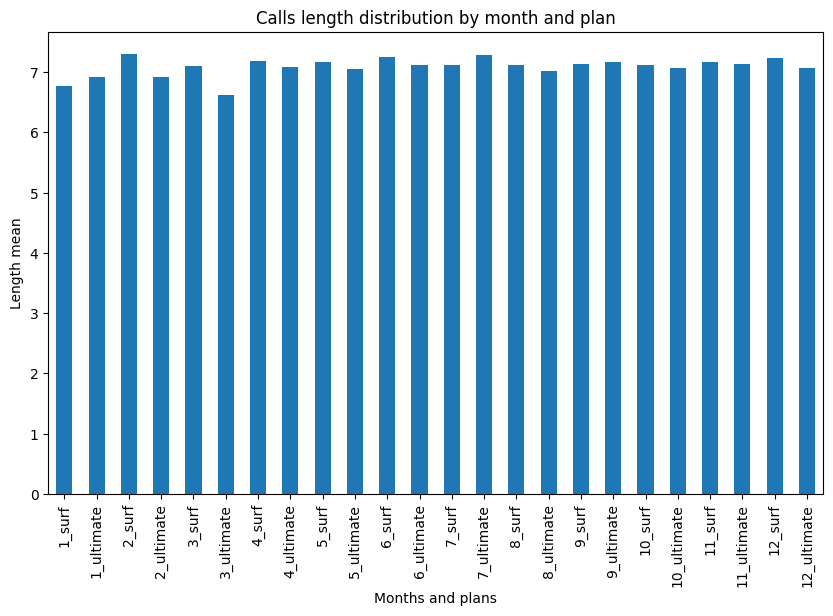

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Generación de dataframe de los valores medios de duración de llamada por plan y por mes
calls_with_plans=calls.merge(users, on="user_id", how="left")
calls_with_plans["month_call"]=calls_with_plans["call_date"].dt.month
call_length=calls_with_plans.groupby(["month","plan"])["duration"].mean().reset_index()
#Código para dar formato a nombres de columnas y campos concatenados de mes y plan
call_length.columns=(["month","plan","length_mean"])
call_length['month_plan'] = call_length['month'].astype(str) + '_' + call_length['plan']
#Impresión de gráfica de barras
call_length.plot(kind="bar",title="Calls length distribution by month and plan",x="month_plan",y="length_mean",xlabel="Months and plans",ylabel="Length mean",legend=False,figsize=[10,6])
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Ojo con este gráfico, no se nota tan bien la comparación porque las barras son del mismo color. Puedes usar ester código, donde se usa `plt.bar` y el parámetro `align` para mover un poco cada barra y que queden una al lado de la otra. Te dejo un ejemplo

```python
plt.bar(surf_data['call_date_y'], surf_data['total_minutos'], width=0.4, label='Surf', color='skyblue', align='center')
plt.bar(ultimate_data['call_date_y'], ultimate_data['total_minutos'], width=0.4, label='Ultimate', color='salmon', align='edge')
```
</div>

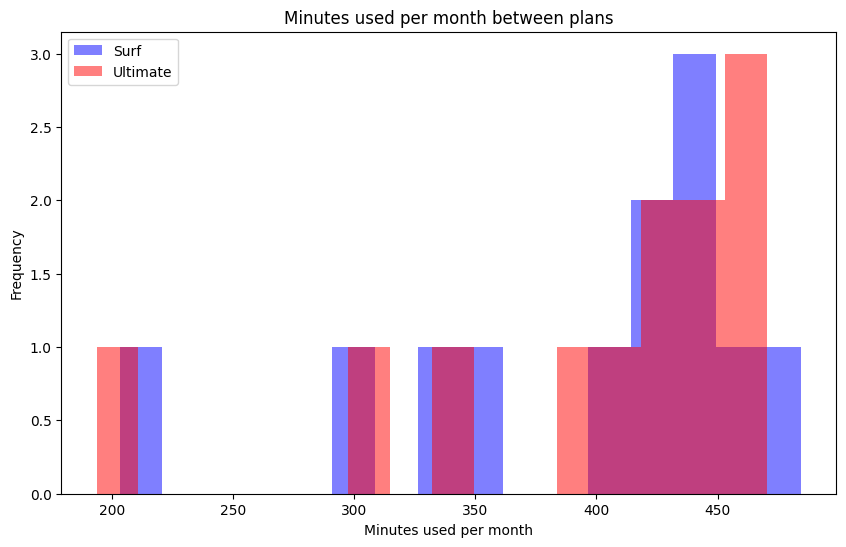

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Generación de dataframe que agrupa los datos de las llamadas por mes, plan y usuario, para conocer la cantidad de minutos que usa cada ususario por mes
minutes_per_month=calls_with_plans.groupby(["month","plan","user_id"])["duration"].sum().reset_index()
minutes_per_month.columns=(["month","plan","user_id","minutes_used"])
#Generación de nuevo Dataframe que agrupa los datos del Dataframe anterior solo por mes y plan, para generar un promedio de los minutos usados por los usuarios en cada mes y por cada plan 
minutes_per_month_mean=minutes_per_month.groupby(["month","plan"])["minutes_used"].mean().reset_index()
minutes_per_month_mean.columns=(["month","plan","minutes_used_mean"])
#División de dataframe anterior en datos por separado para plan surf y plan ultimate
minutes_surf=minutes_per_month_mean[minutes_per_month_mean["plan"]=="surf"]
minutes_ultimate=minutes_per_month_mean[minutes_per_month_mean["plan"]=="ultimate"]

plt.figure(figsize=[10,6])
plt.hist(minutes_surf['minutes_used_mean'], bins=16, alpha=0.5, label='Surf', color='blue')
plt.hist(minutes_ultimate['minutes_used_mean'], bins=16, alpha=0.5, label='Ultimate', color='red')
plt.xlabel('Minutes used per month')
plt.ylabel('Frequency')
plt.title('Minutes used per month between plans')
plt.legend(["Surf","Ultimate"])
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Dataframe que toma los valores de duración mensual de llamadas de los ususarios y saca el promedio en cada mes y por cada plan
call_duration_mean=usagepermonth_plans_user.groupby(["month","plan_name"])["num_minutes"].mean().reset_index()
call_duration_mean.columns=["month","plan_name","duration_mean"]
call_duration_mean['plan_month'] = call_duration_mean['plan_name'] + '_' + call_duration_mean['month'].astype(str)

#Dataframe que toma los valores de duración mensual de llamadas de los ususarios y saca la varianza en cada mes y por cada plan
call_duration_var = usagepermonth_plans_user.groupby(["month","plan_name"])["num_minutes"].agg(np.var).reset_index()
call_duration_var.columns=["month","plan_name","duration_variance"]
call_duration_var['plan_month'] = call_duration_var['plan_name'] + '_' + call_duration_var['month'].astype(str)

#Cálculo de la media de la duración de llamadas de todos los meses por plan
month_call_duration_surf_mean = call_duration_mean[call_duration_mean["plan_name"]=="surf"]["duration_mean"].mean()
month_call_duration_ultimate_mean = call_duration_mean[call_duration_mean["plan_name"]=="ultimate"]["duration_mean"].mean()

print(call_duration_mean)
print("")
print("El promedio de duración mensual de llamadas para el plan surf es: ",month_call_duration_surf_mean)
print("El promedio de duración mensual de llamadas para el plan ultimate es: ",month_call_duration_ultimate_mean)
print("")
print(call_duration_var)

    month plan_name  duration_mean   plan_month
0       1      surf     203.000000       surf_1
1       1  ultimate     193.500000   ultimate_1
2       2      surf     297.000000       surf_2
3       2  ultimate     403.142857   ultimate_2
4       3      surf     330.000000       surf_3
5       3  ultimate     304.250000   ultimate_3
6       4      surf     351.540000       surf_4
7       4  ultimate     336.857143   ultimate_4
8       5      surf     399.584416       surf_5
9       5  ultimate     406.241379   ultimate_5
10      6      surf     431.298969       surf_6
11      6  ultimate     370.957447   ultimate_6
12      7      surf     449.983471       surf_7
13      7  ultimate     427.067797   ultimate_7
14      8      surf     410.111111       surf_8
15      8  ultimate     421.436620   ultimate_8
16      9      surf     414.226804       surf_9
17      9  ultimate     437.511628   ultimate_9
18     10      surf     429.729958      surf_10
19     10  ultimate     450.735849  ulti

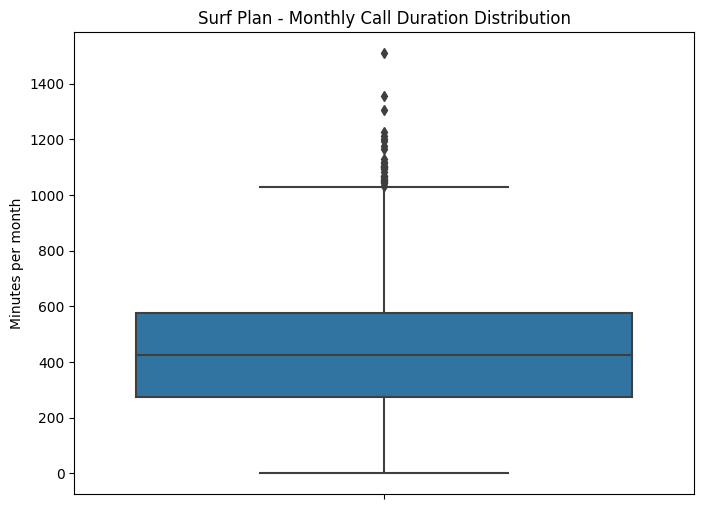

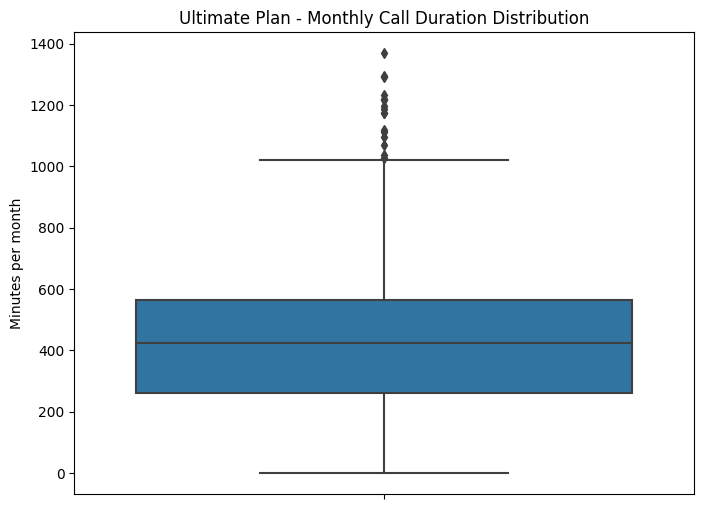

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#Separación del total de datos de uso de recursos por planes diferentes. 
surf_users=usagepermonth_plans_user[usagepermonth_plans_user["plan_name"]=="surf"]
ultimate_users=usagepermonth_plans_user[usagepermonth_plans_user["plan_name"]=="ultimate"]

plt.figure(figsize=[8, 6])
sns.boxplot(y=surf_users["num_minutes"])
plt.title('Surf Plan - Monthly Call Duration Distribution')
plt.ylabel('Minutes per month')
plt.show()

plt.figure(figsize=[8, 6])
sns.boxplot(y=ultimate_users["num_minutes"])
plt.title('Ultimate Plan - Monthly Call Duration Distribution')
plt.ylabel('Minutes per month')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Pareciera que no hay cambio alguno percibido por medio de parámetros estadísticos como la media, puesto que se puede percibir con los diagramas de caja que factores como la media, el IQR, y los rangos de valores poco comunes son muy similares entre los comportamientos de cada plan.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Excelente trabajo con los análisis de distribución y del cálculo de media y varianza. Estos nos indican que ambos planes son similares en consumo de llamadas si los vemos en un total de la data, aunque a lo largo de los meses han tenido diferencias que disminuyeron en los meses recientes.

</div>

### Mensajes

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Dataframe que toma los valores de uso mensual de mensajes de los ususarios y saca el promedio en cada mes y por cada plan
month_messages_usage=usagepermonth_plans_user.groupby(["month","plan_name"])["num_messages"].mean().reset_index()
month_messages_usage.columns=["month","plan_name","num_messages_mean"]
month_messages_usage['plan_month'] = month_messages_usage['plan_name'] + '_' + month_messages_usage['month'].astype(str)

#Dataframe que toma los valores de número mensual de mensajes de los usuarios y saca la varianza en cada mes y por cada plan
month_messages_usage_var = usagepermonth_plans_user.groupby(["month","plan_name"])["num_messages"].agg(np.var).reset_index()
month_messages_usage_var.columns=["month","plan_name","num_messages_variance"]
month_messages_usage_var['plan_month'] = month_messages_usage_var['plan_name'] + '_' + month_messages_usage_var['month'].astype(str)

#Cálculo de la media del número de mensajes de todos los meses por plan
month_num_messages_surf_mean = month_messages_usage[month_messages_usage["plan_name"]=="surf"]["num_messages_mean"].mean()
month_num_messages_ultimate_mean = month_messages_usage[month_messages_usage["plan_name"]=="ultimate"]["num_messages_mean"].mean()

print(month_messages_usage)
print("")
print("El promedio de duración mensual de llamadas para el plan surf es: ",month_num_messages_surf_mean)
print("El promedio de duración mensual de llamadas para el plan ultimate es: ",month_num_messages_ultimate_mean)
print("")
print(month_messages_usage_var)


    month plan_name  num_messages_mean   plan_month
0       1      surf          10.500000       surf_1
1       1  ultimate          15.500000   ultimate_1
2       2      surf          12.000000       surf_2
3       2  ultimate          21.571429   ultimate_2
4       3      surf          15.260870       surf_3
5       3  ultimate          20.250000   ultimate_3
6       4      surf          17.400000       surf_4
7       4  ultimate          22.047619   ultimate_4
8       5      surf          24.012987       surf_5
9       5  ultimate          32.103448   ultimate_5
10      6      surf          25.298969       surf_6
11      6  ultimate          29.340426   ultimate_6
12      7      surf          27.033058       surf_7
13      7  ultimate          32.830508   ultimate_7
14      8      surf          28.777778       surf_8
15      8  ultimate          38.478873   ultimate_8
16      9      surf          30.762887       surf_9
17      9  ultimate          37.895349   ultimate_9
18     10   

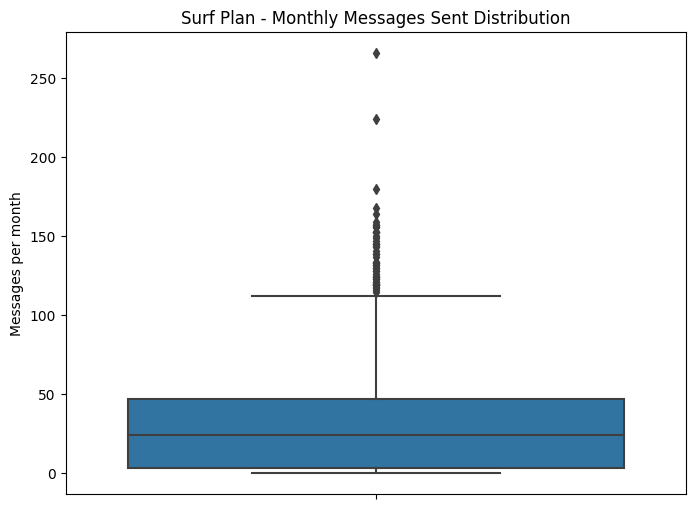

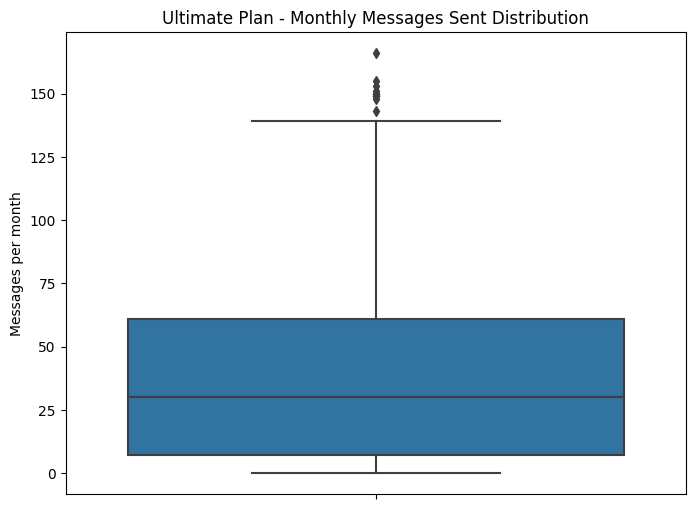

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de mensajes mensual

plt.figure(figsize=[8, 6])
sns.boxplot(y=surf_users["num_messages"])
plt.title('Surf Plan - Monthly Messages Sent Distribution')
plt.ylabel('Messages per month')
plt.show()

plt.figure(figsize=[8, 6])
sns.boxplot(y=ultimate_users["num_messages"])
plt.title('Ultimate Plan - Monthly Messages Sent Distribution')
plt.ylabel('Messages per month')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

En este escenario ya se logran percibir más diferencias. Curiosamente, se encuentra la siguiente información:

1. Las medias de mensajes enviados mensualmente entre planes son relativamente próximos entre sí.
2. Ambas distribuciones son de tipo sesgadas por la izquierda.
3. Mientras que para el plan surf, los valores poco comúnes comienzan alrededor de los 120 mensajes en adelante, para el plan ultimate comienzan alrededor de los 140 mensajes en adelante.
4. En el plan surf existe una muy pequeña distribución de clientes que prefieren seguir pagando por un plan menor, a pesar de contar con un uso de mensajes considerable (valores de 200 mensajes en adelante).

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Excelente, muy bien con la comparación del consumo de mensajes entre los planes. Vemos que se diferencian más que las llamadas.



</div>

### Internet

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Dataframe que toma los valores de uso mensual de internet de los usuarios y saca el promedio en cada mes y por cada plan
month_mb_usage=usagepermonth_plans_user.groupby(["month","plan_name"])["mb_amount"].mean().reset_index()
month_mb_usage.columns=["month","plan_name","num_mb_mean"]
month_mb_usage["num_gb_mean"]=np.ceil(month_mb_usage["num_mb_mean"]/1024)
month_mb_usage['plan_month'] = month_mb_usage['plan_name'] + '_' + month_mb_usage['month'].astype(str)

#Dataframe que toma los valores de uso mensual de internet de los usuarios y saca la varianza en cada mes y por cada plan
month_mb_usage_var = usagepermonth_plans_user.groupby(["month","plan_name"])["mb_amount"].agg(np.var).reset_index()
month_mb_usage_var.columns=["month","plan_name","num_mb_variance"]
month_mb_usage_var['plan_month'] = month_mb_usage_var['plan_name'] + '_' + month_mb_usage_var['month'].astype(str)

#Cálculo de la media del número de mensajes de todos los meses por plan
month_num_mb_surf_mean = month_mb_usage[month_mb_usage["plan_name"]=="surf"]["num_mb_mean"].mean()
month_num_mb_ultimate_mean = month_mb_usage[month_mb_usage["plan_name"]=="ultimate"]["num_mb_mean"].mean()

print(month_mb_usage)
print("")
print("El promedio de uso mensual de internet [en mb] para el plan surf es: ",month_num_mb_surf_mean)
print("El promedio de uso mensual de internet [en mb] para el plan ultimate es: ",month_num_mb_ultimate_mean)
print("El promedio de uso mensual de internet [en gb] para el plan surf es: ",np.ceil(month_num_mb_surf_mean/1024))
print("El promedio de uso mensual de internet [en gb] para el plan ultimate es: ",np.ceil(month_num_mb_ultimate_mean/1024))
print("")
print(month_mb_usage_var)


    month plan_name   num_mb_mean  num_gb_mean   plan_month
0       1      surf   4874.860000          5.0       surf_1
1       1  ultimate   6918.092500          7.0   ultimate_1
2       2      surf  12178.843333         12.0       surf_2
3       2  ultimate  17128.808571         17.0   ultimate_2
4       3      surf  13345.440000         14.0       surf_3
5       3  ultimate  18321.518333         18.0   ultimate_3
6       4      surf  11984.203000         12.0       surf_4
7       4  ultimate  16121.654762         16.0   ultimate_4
8       5      surf  13936.354935         14.0       surf_5
9       5  ultimate  16624.482414         17.0   ultimate_5
10      6      surf  15301.529175         15.0       surf_6
11      6  ultimate  15337.921064         15.0   ultimate_6
12      7      surf  16783.600579         17.0       surf_7
13      7  ultimate  16344.744407         16.0   ultimate_7
14      8      surf  16795.331358         17.0       surf_8
15      8  ultimate  17814.720141       

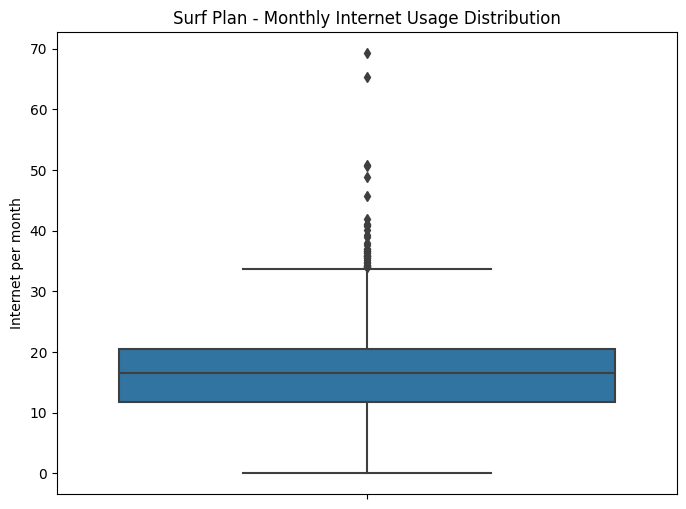

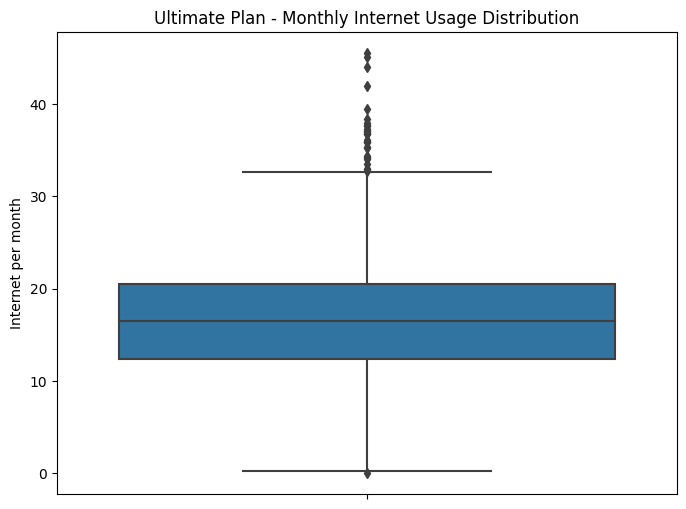

In [38]:
# Traza un diagrama de caja para visualizar la distribución del uso0 de internet mensual

plt.figure(figsize=[8, 6])
sns.boxplot(y=surf_users["gb_amount"])
plt.title('Surf Plan - Monthly Internet Usage Distribution')
plt.ylabel('Internet per month')
plt.show()

plt.figure(figsize=[8, 6])
sns.boxplot(y=ultimate_users["gb_amount"])
plt.title('Ultimate Plan - Monthly Internet Usage Distribution')
plt.ylabel('Internet per month')
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

En este escenario ya se logran percibir más diferencias. Curiosamente, se encuentra la siguiente información:

1. Las medias de internet utilizado mensualmente entre planes son relativamente próximos entre sí.
2. Ambas distribuciones son de tipo sesgadas por la izquierda.
3. Ambas distribuciones parecen tener los mismos rangos para el IQR y el rango de valores relevantes en la distribución.
4. Sin embargo, existe un rango de valores poco comúnes más marcado en el plan surf, donde existen usuarios que gastan cantidades de 50 y más GB al mes, y que tienen contratado dicho plan; mientras que el rango de valores poco comunes del plan ultimate es menor puesto que lo más lejano de datos utilizados que se percibe es de menos de 50 GB.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Correcto. El consumo de internet entre planes se ve muy similar.



</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [39]:
#Dataframe que toma los valores de los totales de las cuentas de los usuarios por su uso de llamadas, mensajes e internet y saca el promedio en cada mes y por cada plan
account_sizes_mean=usagepermonth_plans_user.groupby(["month","plan_name"])["account_payable"].mean().reset_index()
account_sizes_mean.columns=["month","plan_name","accounts_size_mean"]
account_sizes_mean['plan_month'] = account_sizes_mean['plan_name'] + '_' + account_sizes_mean['month'].astype(str)

#Dataframe que toma los valores de los totales de las cuentas de los usuarios por su uso de llamadas, mensajes e internet y saca la varianza en cada mes y por cada plan
account_sizes_var = usagepermonth_plans_user.groupby(["month","plan_name"])["account_payable"].agg(np.var).reset_index()
account_sizes_var.columns=["month","plan_name","account_sizes_variance"]
account_sizes_var['plan_month'] = account_sizes_var['plan_name'] + '_' + account_sizes_var['month'].astype(str)

#Cálculo de la media del número de los totales de las cuentas de los usuarios por su uso de llamadas, mensajes e internet; de todos los meses y por plan
months_account_sizes_surf_mean =account_sizes_mean[account_sizes_mean["plan_name"]=="surf"]["accounts_size_mean"].mean()
months_account_sizes_ultimate_mean = account_sizes_mean[account_sizes_mean["plan_name"]=="ultimate"]["accounts_size_mean"].mean()

print(account_sizes_mean)
print("")
print("El promedio de los totales de cuenta para el plan surf es: ",months_account_sizes_surf_mean,"[usd]")
print("El promedio de los totales de cuenta para el plan ultimate es: ",months_account_sizes_ultimate_mean,"[usd]")
print("")
print(account_sizes_var)

    month plan_name  accounts_size_mean   plan_month
0       1      surf           20.000000       surf_1
1       1  ultimate           70.000000   ultimate_1
2       2      surf           34.396667       surf_2
3       2  ultimate           70.000000   ultimate_2
4       3      surf           45.941304       surf_3
5       3  ultimate           74.666667   ultimate_3
6       4      surf           40.710600       surf_4
7       4  ultimate           73.000000   ultimate_4
8       5      surf           47.628182       surf_5
9       5  ultimate           70.724138   ultimate_5
10      6      surf           49.276289       surf_6
11      6  ultimate           71.638298   ultimate_6
12      7      surf           62.674050       surf_7
13      7  ultimate           71.898305   ultimate_7
14      8      surf           63.931173       surf_8
15      8  ultimate           72.859155   ultimate_8
16      9      surf           58.271495       surf_9
17      9  ultimate           72.034884   ulti

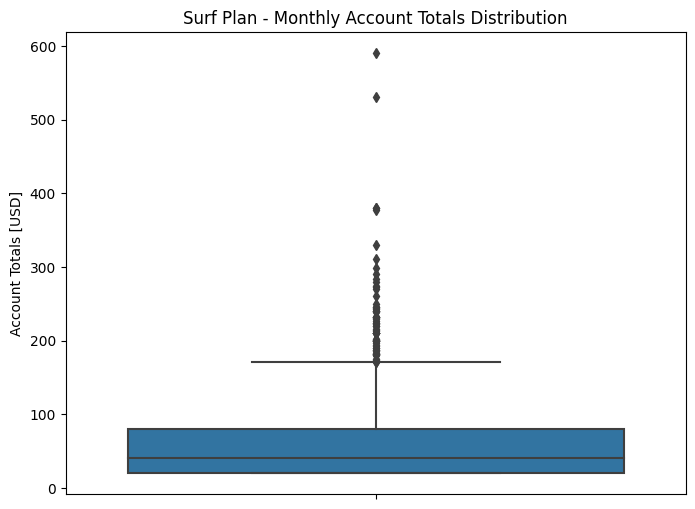

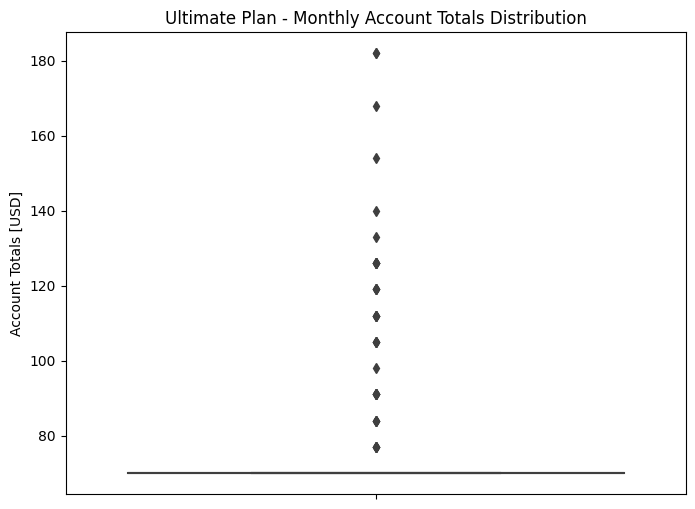

In [40]:
# Traza un diagrama de caja para visualizar la distribución de los totales de cuenta mensuales

plt.figure(figsize=[8, 6])
sns.boxplot(y=surf_users["account_payable"])
plt.title('Surf Plan - Monthly Account Totals Distribution')
plt.ylabel('Account Totals [USD]')
plt.show()

plt.figure(figsize=[8, 6])
sns.boxplot(y=ultimate_users["account_payable"])
plt.title('Ultimate Plan - Monthly Account Totals Distribution')
plt.ylabel('Account Totals [USD]')
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


La principal diferencia que se puede percibir entre las distribuciones de ambos planes es que los usuarios con plan ultimate tienen un control más marcado de los gastos que generan mensualmente por sus servicios de telecomunicaciones usados, puesto que la región del cuadro correspondiente al IQR es prácticamente una línea, como si pudiesemos decir que la media y los cuartiles primero y tercero están muy pegados entre sí; considerando que existen las excepciones de ususarios con cuentas mayores pero que son las mínimas.
Por otra parte, se logra percibir que los usuarios con plan surf tienen un uso menos controlado de sus servicios, puesto que considerando que el costo regular del plan (sin uso excedido de los servicios) es de 20 usd, el cual suena razonable que fuese el valor del primer cuartil (puesto que no se puede gastar menos que 20 usd), existe una considerable distribución de usuarios que tienen cuentas mensuales con totales mayores a los 20, hablando de que el promedio de esas cuentas es de aproximádamente 40-50 usd. Esto hace más sentido al percibir que el tercer cuartil se encuentra cercano a aproximadamente 80-90 usd, y el cuarto cuartil se encuentra cercano a los 200 usd.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Bien hecho. Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [41]:
# Prueba las hipótesis
print("Hipótesis nula: El ingreso promedio de los usuarios del plan Ultimate es igual al ingreso promedio de los usuarios del plan Surf.")
print("Hipótesis alternativa: El ingreso promedio de los usuarios del plan Ultimate es diferente al ingreso promedio de los usuarios del plan Surf.")
alpha=0.05
results = st.ttest_ind(surf_users["account_payable"],ultimate_users["account_payable"],equal_var=False)
print('valor p:', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Hipótesis nula: El ingreso promedio de los usuarios del plan Ultimate es igual al ingreso promedio de los usuarios del plan Surf.
Hipótesis alternativa: El ingreso promedio de los usuarios del plan Ultimate es diferente al ingreso promedio de los usuarios del plan Surf.
valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [42]:
# Prueba las hipótesis
#Generación de un dataframe de apoyo que junta los datos del dataframe que tenía los gastos por mes de los usuarios por cada tipo de servicio y sus datos personales
usagepermonth_plans_userdetailed=usagepermonth_plans_user.merge(users,on="user_id",how="left")
#distinción de dataframes por usuarios del área de NY-NJ y los de otras regiones
ny_nj_users=usagepermonth_plans_userdetailed[usagepermonth_plans_userdetailed["state_code"]=="NY-NJ-PA"]
other_regions_users=usagepermonth_plans_userdetailed[usagepermonth_plans_userdetailed["state_code"]!="NY-NJ-PA"]

print("Hipótesis nula: El ingreso promedio de los usuarios de NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.")
print("Hipótesis alternativa: El ingreso promedio de los usuarios de NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.")
alpha=0.05
results = st.ttest_ind(ny_nj_users["account_payable"],other_regions_users["account_payable"],equal_var=False)
print('valor p:', results.pvalue)
if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Hipótesis nula: El ingreso promedio de los usuarios de NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.
Hipótesis alternativa: El ingreso promedio de los usuarios de NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.
valor p: 0.0335256158853001
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. Decisiones de Preprocesamiento de Datos
Decisión: Estandarizar unidades de medida (MB/GB) y crear columnas adicionales
- Justificación: Facilitó el análisis al tener datos consistentes
- Impacto: Permitió comparaciones más precisas entre planes

Decisión: Rellenar valores nulos con fechas futuras (2200-12-31) para churn_date
- Justificación: Distinguir usuarios activos de los que cancelaron
- Impacto: Mantuvo la integridad del dataset sin perder información

Decisión: Aplicar np.ceil() a la duración de llamadas
- Justificación: Seguir las reglas de facturación de Megaline
- Impacto: Cálculos de ingresos más precisos

2. Hallazgos sobre Comportamiento de Usuarios
Llamadas: No hay diferencias significativas entre planes
- Los usuarios de ambos planes tienen patrones similares de duración

Mensajes: Diferencias moderadas entre planes
- Ultimate: Mayor uso promedio (31.1 vs 24.7 mensajes/mes)
- Ambos planes muestran distribuciones sesgadas

Internet: Diferencias notables en control de gastos
- Surf: Mayor variabilidad, usuarios menos controlados
- Ultimate: Uso más consistente y controlado

3. Resultados de Pruebas de Hipótesis
Hipótesis 1 (Ingresos por plan): RECHAZADA (p < 0.001)
- Conclusión: Los ingresos promedio SÍ difieren significativamente entre planes
- Ultimate genera ingresos más estables (~$72/mes)
- Surf genera ingresos más variables (~$51/mes promedio)

Hipótesis 2 (Ingresos por región): RECHAZADA (p = 0.033)
- Conclusión: Los usuarios de NY-NJ SÍ generan ingresos diferentes
- Existe diferencia regional significativa en patrones de gasto

4. Recomendación Estratégica

Plan Ultimate es más rentable porque:
Genera ingresos más altos y predecibles
Usuarios más controlados en sus gastos
Menor variabilidad en facturación mensual

Plan Surf presenta:
Mayor riesgo por variabilidad de ingresos
Usuarios con patrones de gasto menos predecibles
Potencial de ingresos altos pero inconsistentes

<div class="alert alert-block alert-success">
<b>Comentario de Revisor           </b> <a class="tocSkip"></a>

¡Muy buenas conclusiones! Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!


PD: Cuando escribes el símbolo `$`, se activa el modo matemático LaTeX y por ello las letras se ven diferentes después de ese símbolo. Para evitar esto, escribe un backslash antes, así `\$`. De este modo puedes escribir el símbolo \$ sin problemas.   


    
</div>